# PART 1 - Mounting and cleaning our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re as re

In [2]:
# The dataset contains structured data about cars, however some of the data is empty
# Load csv files
risk = pd.read_csv('https://raw.githubusercontent.com/Adhito/learning_analytics/main/KSS_Session_01_Analytics/Automobile%20Dataset/automobile-risk.csv')
spec = pd.read_csv('https://raw.githubusercontent.com/Adhito/learning_analytics/main/KSS_Session_01_Analytics/Automobile%20Dataset/automobile-spec.csv')

In [3]:
# Check first 5 data of risk dataframe
risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [4]:
# Rename a risk dataframe column
risk = risk.rename(columns={"symboling": "risk_level"})
risk.head()

,ID,risk_level
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [5]:
# Check first 5 data of spec dataframe
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## 1. Combine 2 Tables (risk & spec) using ID as key

In [6]:
fulljoin = pd.merge(spec, risk, how='outer', on='ID')

In [7]:
fulljoin.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_level
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


## 2. Quick-look (dimension, data type, head/tail, summary statistics, etc) 

In [8]:
# Get info of dataframe shape (rows , column)
fulljoin.shape

(205, 26)

In [9]:
# Get detailed information about column name, filled data count, datatype
fulljoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       204 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheel        205 non-null    object 
 7   engine-loc         205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  cylinder           205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [10]:
# Get descriptive statistic information of data.
fulljoin.describe()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_level
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000


 ## 3. Handling missing value

In [11]:
fulljoin.isnull().sum().sort_values(ascending=False)

stroke               4
bore                 4
price                4
peak-rpm             2
horsepower           2
num-of-doors         1
risk_level           0
length               0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
curb-weight          0
width                0
height               0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
compression-ratio    0
city-mpg             0
highway-mpg          0
ID                   0
dtype: int64

In [12]:
# Fill missing data with mode
fulljoin['num-of-doors'].fillna(fulljoin['num-of-doors'].mode()[0], inplace=True)

In [13]:
# Fill missing data with min
fulljoin['peak-rpm'].fillna(fulljoin['peak-rpm'].min(), inplace=True)

In [14]:
# Fill missing data with mean
fulljoin['bore'].fillna(fulljoin['bore'].mean(), inplace=True)
fulljoin['stroke'].fillna(fulljoin['stroke'].mean(), inplace=True)
fulljoin['price'].fillna(fulljoin['price'].mean(), inplace=True)
fulljoin['horsepower'].fillna(fulljoin['horsepower'].mean(), inplace=True)

In [15]:
fulljoin.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
risk_level           0
dtype: int64

In [16]:
fulljoin.head(5)

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_level
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


 ## 4.  Perform visualization to ease and help understanding  of data

### Scatterplot

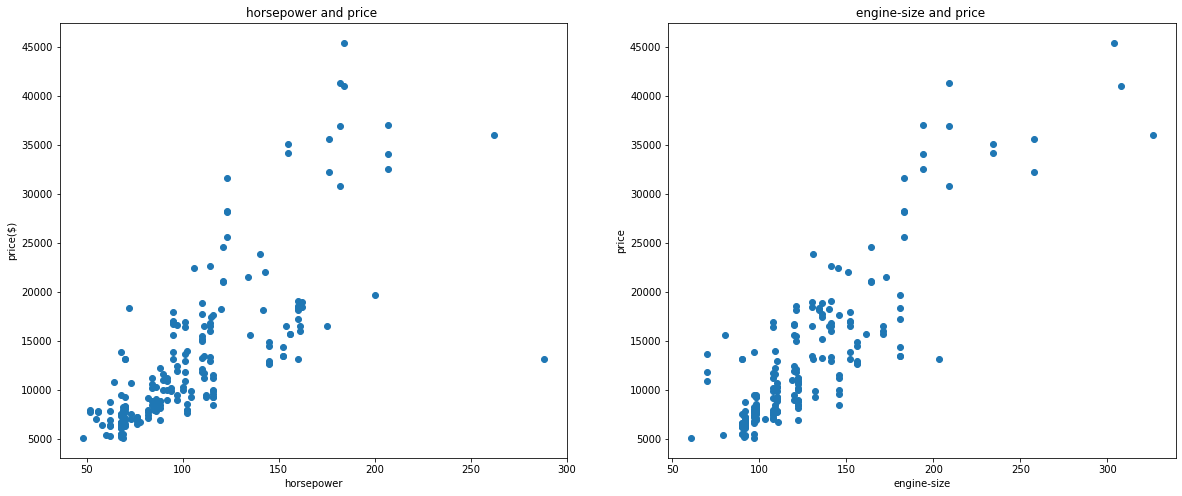

In [17]:
## Define plot size
f=plt.figure(figsize=(20,8))

## Scatter plot horse power and price
f.add_subplot(1,2,1)
horse_price= plt.scatter(fulljoin['horsepower'],fulljoin['price'])
plt.title('horsepower and price ')
plt.xlabel('horsepower')
plt.ylabel('price($)')

## Scatter plot city-mpg and highway-mpg
f.add_subplot(1,2,2)
horse_price= plt.scatter(fulljoin['engine-size'],fulljoin['price'])
plt.title('engine-size and price ')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

### Histogram

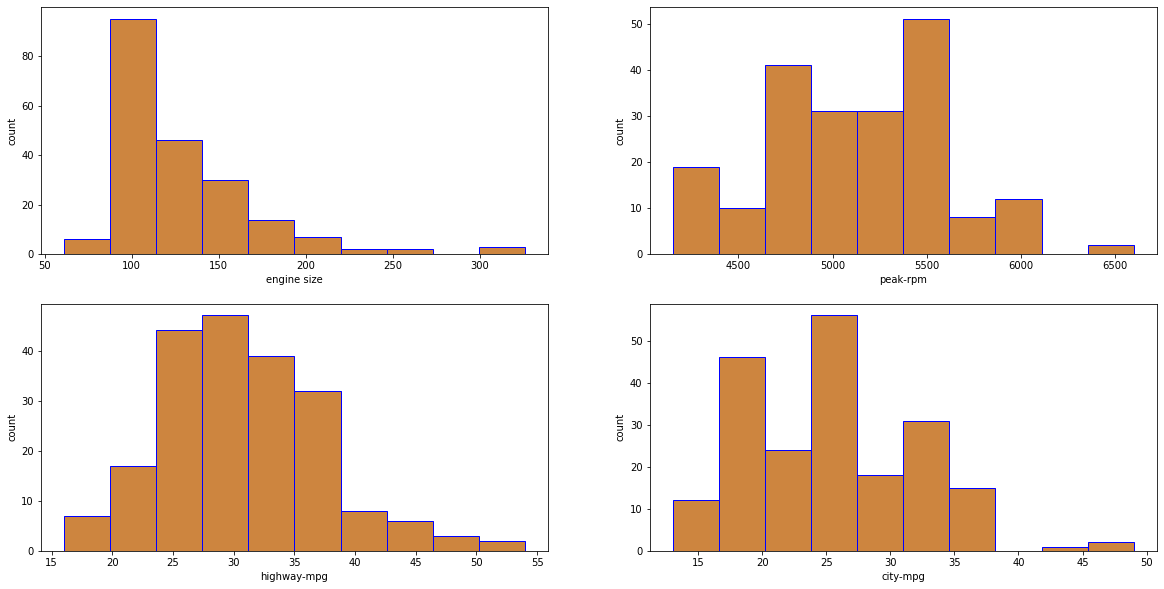

In [18]:
f=plt.figure(figsize=(20,10))

f.add_subplot(2,2,1)
histo_engine= plt.hist(fulljoin['engine-size'],
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('engine size')
plt.ylabel('count')

f.add_subplot(2,2,2)
histo_peakrpm = plt.hist(fulljoin['peak-rpm'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('peak-rpm')
plt.ylabel('count')

f.add_subplot(2,2,3)
histo_price = plt.hist(fulljoin['highway-mpg'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('highway-mpg')
plt.ylabel('count')

f.add_subplot(2,2,4)
histo_price = plt.hist(fulljoin['city-mpg'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('city-mpg')
plt.ylabel('count')



plt.show()

### Barplot

Text(0, 0.5, 'count')

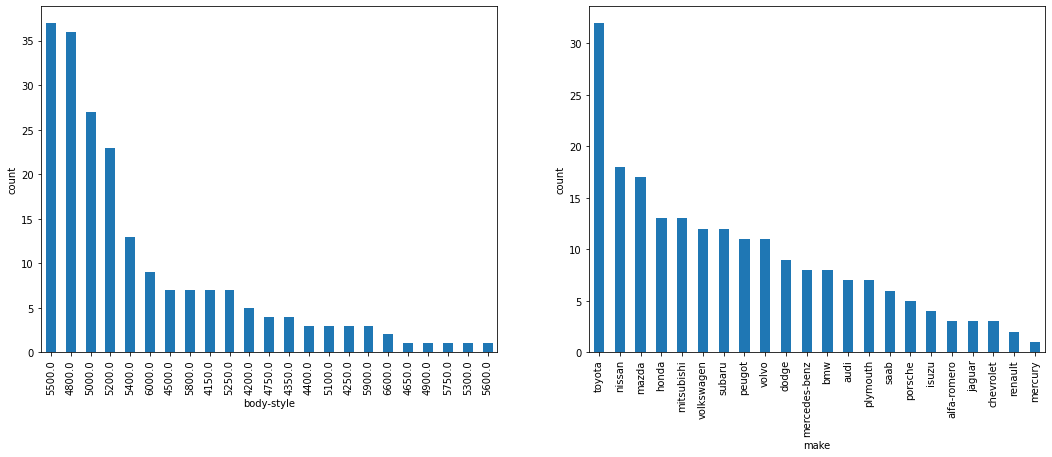

In [19]:
f=plt.figure(figsize=(18,14))

f.add_subplot(2,2,3)
barplot_make = fulljoin['peak-rpm'].value_counts().plot(kind='bar');
plt.xlabel('body-style')
plt.ylabel('count')

f.add_subplot(2,2,4)
barplot_make = fulljoin['make'].value_counts().plot(kind='bar');
plt.xlabel('make')
plt.ylabel('count')

### Boxplot

Text(0.5, 1.0, 'Boxplot - Price')

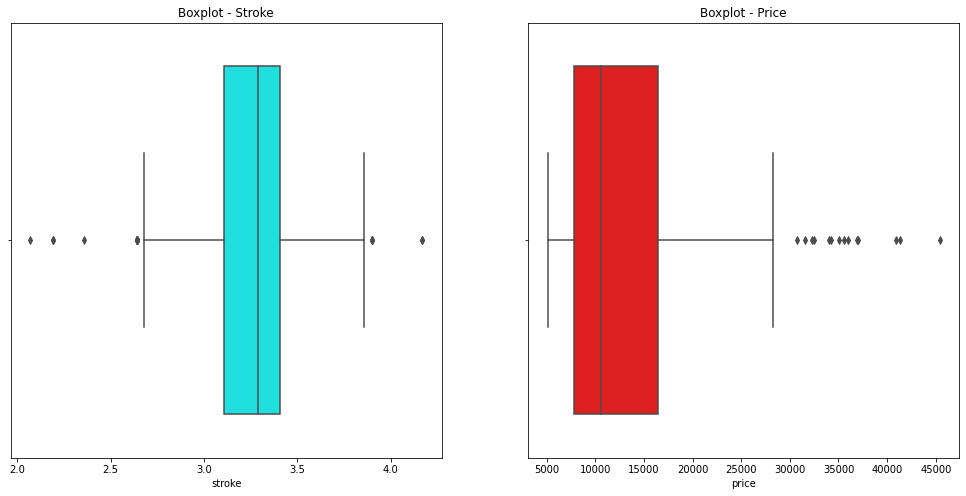

In [20]:
f=plt.figure(figsize=(17,8))

f.add_subplot(1,2,1)
sns.boxplot(data = fulljoin, x = 'stroke', color = 'cyan', orient = "h").set_title('Boxplot - Stroke')

f.add_subplot(1,2,2)
sns.boxplot(data = fulljoin, x = 'price', color = 'red', orient = "h").set_title('Boxplot - Price')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

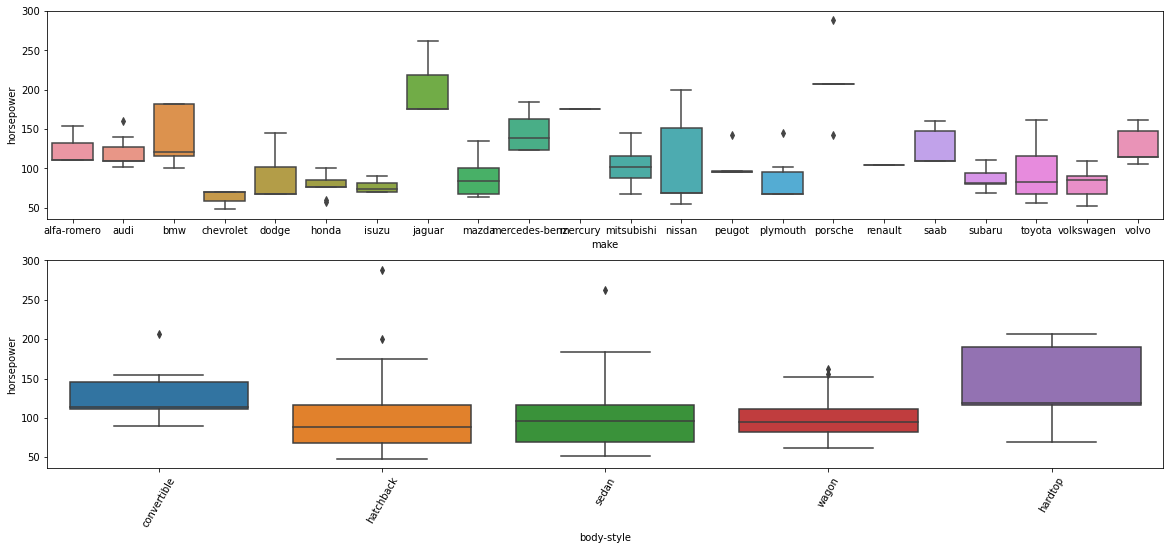

In [21]:
f=plt.figure(figsize=(20,13))
f.add_subplot(3,1,1)
g = sns.boxplot(y=fulljoin["horsepower"], x=fulljoin['make'])
f.add_subplot(3,1,2)
g = sns.boxplot(y=fulljoin["horsepower"], x=fulljoin['body-style'])
plt.xticks(rotation=60)

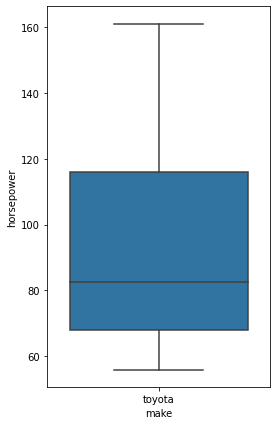

In [22]:
f=plt.figure(figsize=(4,7))
f.add_subplot(1,1,1)
g = sns.boxplot(y=fulljoin["horsepower"], x=fulljoin[fulljoin.make == 'toyota'].make)

### Stackplot

In [23]:
x = fulljoin['make']

In [24]:
y = np.vstack([fulljoin['highway-mpg'],
               fulljoin['city-mpg']]) 

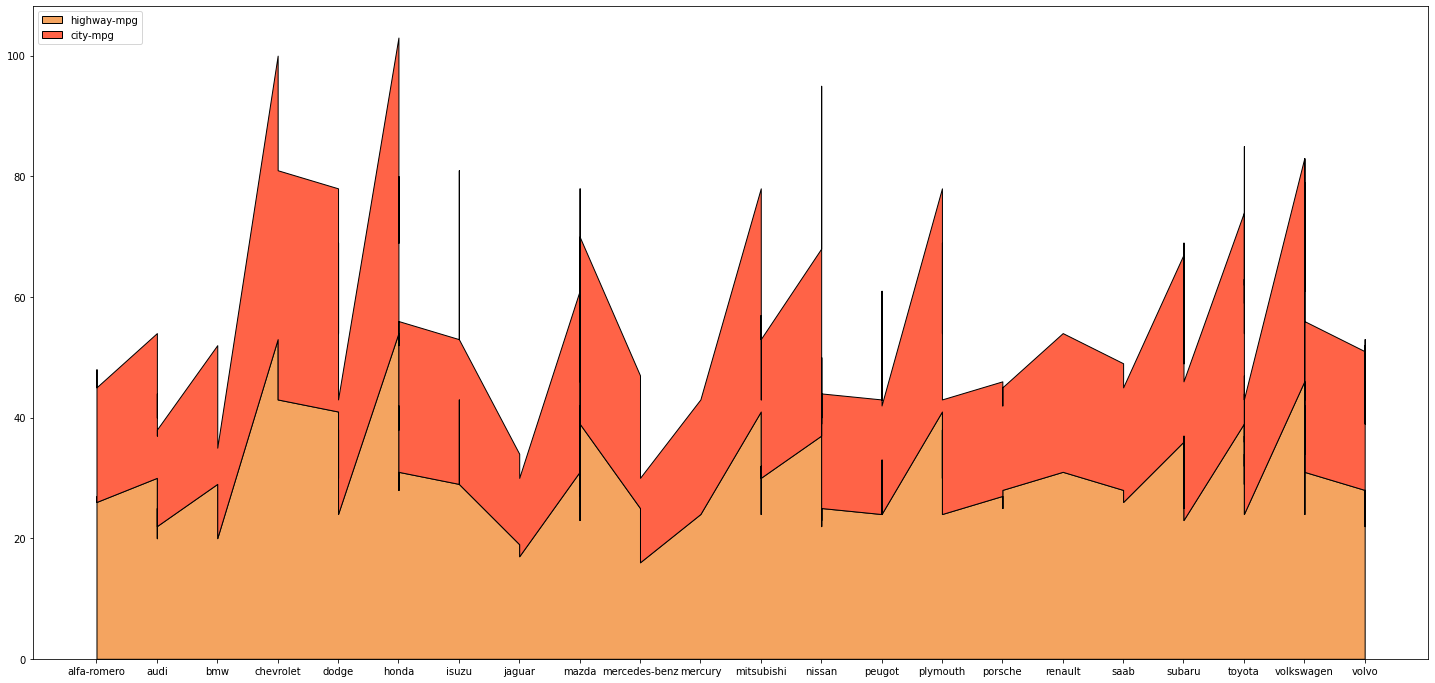

In [25]:
plt.figure(figsize=(25,12))
# Labels for each stack
labels = ['highway-mpg', 
          'city-mpg', 
          ]

# Colors for each stack
colors = ['sandybrown', 
          'tomato', 
          'skyblue']

#  Similar to pandas df.plot.area()
plt.stackplot(x, y, 
              labels=labels,
              colors=colors, 
              edgecolor='black')

# Plots legend to the upperleft of Figure
plt.legend(loc=2)

plt.show()

### Correlation

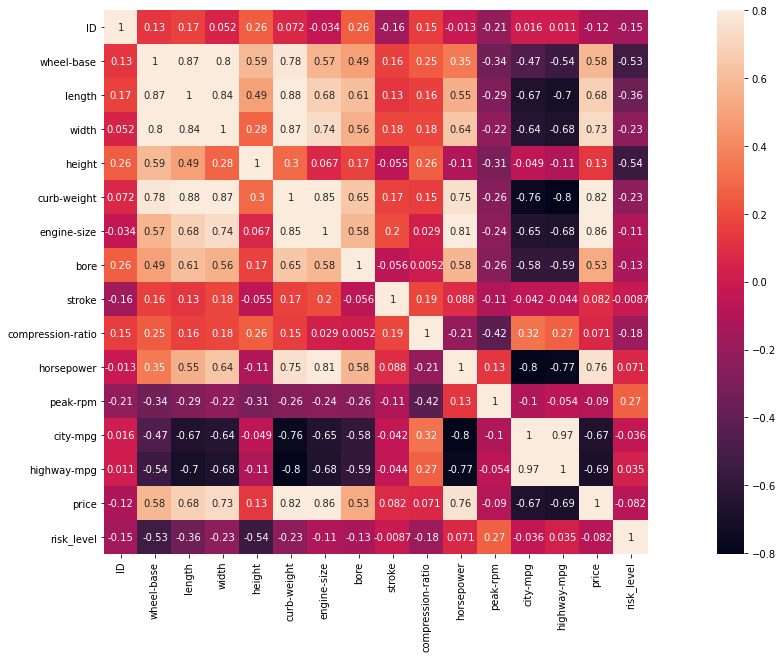

In [26]:
#create correlation with hitmap

#create correlation
corr = fulljoin.corr(method = 'pearson')

fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(25,10)
sns.heatmap(corr,  vmax =  0.8, square = True, annot = True)



---



---






# PART 2 - Exploring the refined data

1.   Who has the most 4WD Car?
4.   What is the Average price based on body-style ?
1.   Who has the car brand with the highest price ?
3.   What is the Average peak-rpm for ‘turbo’ style aspiration car ?
2.   Who has the maximum horsepower for car with 6 cylinder engine ?
5.   What is Average price based on body-style only for Honda car  ?


## Q1. Most 4WD Car

In [37]:
## Filter manufacturer who has 4WD
most_4WD = fulljoin.loc[fulljoin['drive-wheel'] == '4wd']
most_4WD

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_level
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000,2
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353,0
140,141,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.64,8.7,73.0,4400.0,26,31,7603.000000,2
144,145,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,four,108,2bbl,3.62,2.64,9.0,82.0,4800.0,24,25,9233.000000,0
145,146,subaru,gas,turbo,four,sedan,4wd,front,97.0,172.0,65.4,54.3,2510,ohcf,four,108,mpfi,3.62,2.64,7.7,111.0,4800.0,24,29,11259.000000,0
148,149,subaru,gas,std,four,wagon,4wd,front,96.9,173.6,65.4,54.9,2420,ohcf,four,108,2bbl,3.62,2.64,9.0,82.0,4800.0,23,29,8013.000000,0
149,150,subaru,gas,turbo,four,wagon,4wd,front,96.9,173.6,65.4,54.9,2650,ohcf,four,108,mpfi,3.62,2.64,7.7,111.0,4800.0,23,23,11694.000000,0
154,155,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,2290,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,7898.000000,0
155,156,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,8778.000000,0


In [38]:
## Count which manufacturer who has most 4WD and sort by largest
most_4WD = most_4WD.groupby(['make'])['drive-wheel'].count().sort_values(ascending=False)
most_4WD

make
subaru    5
toyota    2
audi      2
Name: drive-wheel, dtype: int64

## Q2. Average price based on body-style

In [41]:
## Body style grouping
bodystyle = fulljoin.groupby('body-style')

## Get average value
avg_price = bodystyle['price'].mean().sort_values(ascending=False)
avg_price

## Q3.  Car brand with highest price

In [31]:
## Manufactrer grouping
carbrand= fulljoin.groupby('make')

## Get max value
higgest_price = carbrand['price'].min().sort_values(ascending=True)
higgest_price.head(5)

## kalau mau nilai , ada detailnya.


make
subaru        5118.0
chevrolet     5151.0
mazda         5195.0
toyota        5348.0
mitsubishi    5389.0
Name: price, dtype: float64

## Q4. Average peak-rpm for ‘turbo’ style aspiration car 

In [48]:
## Select where car aspiration is turbo
turbo_style = fulljoin[fulljoin.aspiration == 'turbo']
turbo_style

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_level
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000,1
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353,0
23,24,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,7957.000000,1
27,28,dodge,gas,turbo,four,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.000000,1
29,30,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.90,7.0,145.0,5000.0,19,24,12964.000000,3
67,68,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.000000,-1
68,69,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.000000,-1
69,70,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.000000,0
70,71,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.000000,-1
75,76,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175.0,5000.0,19,24,16503.000000,1


In [50]:
## Get average value
avg_turbo = turbo_style['peak-rpm'].mean()
avg_turbo

4939.189189189189

## Q5. Maximum horsepower for car with 6 cylinder engine 

In [60]:
## Select where car horsepower is six
six_cylinder = fulljoin[fulljoin.cylinder == 'six']
six_cylinder

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_level
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
12,13,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0,0
13,14,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0,0
14,15,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0,1
15,16,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,0
16,17,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0,0
17,18,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0,0
47,48,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0,0
48,49,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0,0
101,102,nissan,gas,std,four,sedan,fwd,front,100.4,181.7,66.5,55.1,3095,ohcv,six,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,13499.0,0


In [54]:
## Get max value
max_cylinder = six_cylinder['horsepower'].max()
max_cylinder

207.0

In [65]:
## Get max value with column value
max_cylinder = six_cylinder[six_cylinder['horsepower']==six_cylinder['horsepower'].max()]
max_cylinder

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,height,curb-weight,engine-type,cylinder,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_level
126,127,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,32528.0,3
127,128,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,34028.0,3
128,129,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,37028.0,3


## Q6. Average price based on body-style only for Honda car (make=Honda)

In [67]:
## Select where car manufactuer is honda
onlyhonda = fulljoin[fulljoin.make == 'honda']

## Body style grouping
bodystyle = onlyhonda.groupby('body-style')

## Get average price value
avg_price_honda = bodystyle['price'].mean()
avg_price_honda

body-style
hatchback    7054.428571
sedan        9945.000000
wagon        7295.000000
Name: price, dtype: float64